In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']= (17, 5)
sns.set_style('darkgrid')
sns.set(font_scale = 1.4)

In [2]:
data = pd.read_csv('C:\\Users\Maria\Desktop\Data Science\Jupyter\Pfizer Project\\bin_data.csv')

In [3]:
data.shape

(48976, 58)

In [3]:
X = data.drop(['hospitalization', 'gender_M'], axis=1)

y = data['hospitalization']

## 1. Feature Importance

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
X_train= pd.DataFrame(X_train, columns = X.columns)

[Text(0, 0, 'admission_procedure_7'),
 Text(0, 0, 'admission_diagnosis_GASTROINTESTINAL BLEED'),
 Text(0, 0, 'admission_type_NEWBORN'),
 Text(0, 0, 'marital_status_UNKNOWN (DEFAULT)'),
 Text(0, 0, 'admission_procedure_9'),
 Text(0, 0, 'admission_origin_PHYSICAL REFERRAL'),
 Text(0, 0, 'admission_procedure_6'),
 Text(0, 0, 'admission_procedure_8'),
 Text(0, 0, 'admission_procedure_10'),
 Text(0, 0, 'admission_procedure_11'),
 Text(0, 0, 'admission_type_ELECTIVE'),
 Text(0, 0, 'admission_procedure_5'),
 Text(0, 0, 'admission_diagnosis_NEWBORN'),
 Text(0, 0, 'admission_origin_CLINIC REFERRAL'),
 Text(0, 0, 'admission_procedure_4'),
 Text(0, 0, 'age'),
 Text(0, 0, 'admission_diagnosis_STROKE'),
 Text(0, 0, 'marital_status_SINGLE'),
 Text(0, 0, 'admission_procedure_3'),
 Text(0, 0, 'admission_origin_TRANSFER FROM HOSPITAL'),
 Text(0, 0, 'admission_type_EMERGENCY'),
 Text(0, 0, 'admission_procedure_2'),
 Text(0, 0, 'admission_diagnosis_FEVER'),
 Text(0, 0, 'admission_origin_NOT AVAILABLE'),


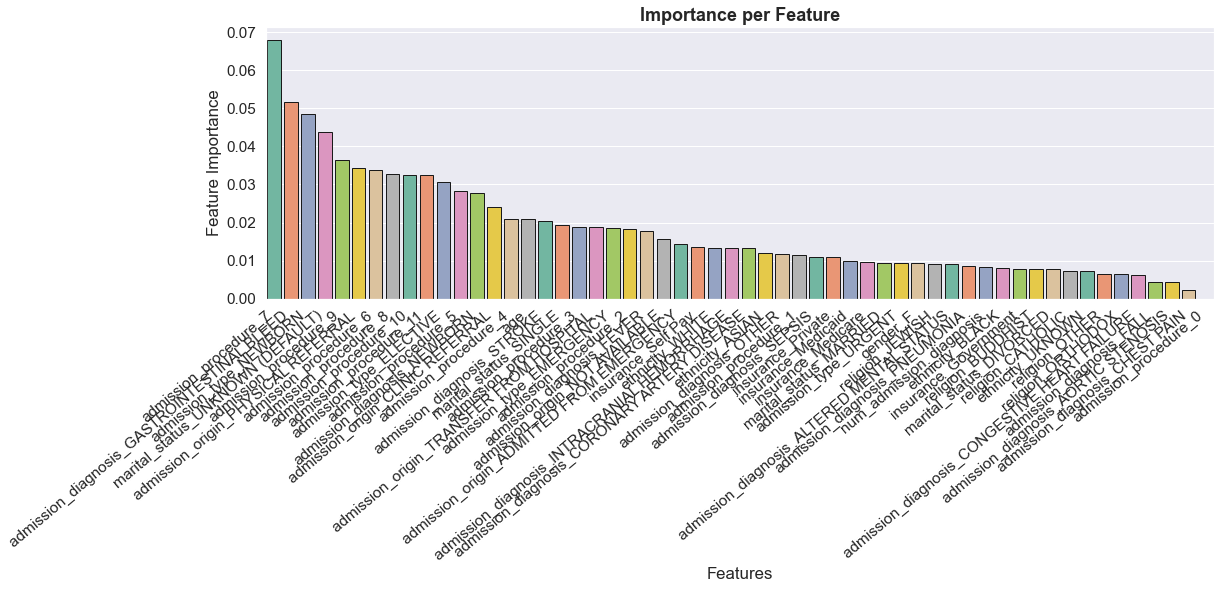

In [23]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)   # Most important features
feat_importances = feat_importances.nlargest(X_train.shape[1])

ax = sns.barplot(feat_importances.index, feat_importances.values, edgecolor = 'k', palette= 'Set2')
ax.set_title('Importance per Feature', fontweight= 'bold', fontsize=18)
ax.set_ylabel('Feature Importance')
ax.set_xlabel('Features')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha= 'right')

In [24]:
pd.DataFrame({'Importance':feat_importances})

,Importance
admission_procedure_7,0.067891
admission_diagnosis_GASTROINTESTINAL BLEED,0.051688
admission_type_NEWBORN,0.048551
marital_status_UNKNOWN (DEFAULT),0.043861
admission_procedure_9,0.036459
admission_origin_PHYSICAL REFERRAL,0.034205
admission_procedure_6,0.033693
admission_procedure_8,0.032873
admission_procedure_10,0.032544
admission_procedure_11,0.032485


## 2. Evaluation Metric: Mean Hospitalization Error

In [36]:
hosp =pd.DataFrame({'Duration (days)': ['<1', '1 - 6','7 - 13', '14 - 29', '30+'],   # Calculating all the possible errors
                    'Mean_Duration': [0.5, 3.5, 10, 21.5, 41],
                    'Actual value = 0' : [0.0, 3.0, 9.5, 21.0, 40.5],
                    'Actual value = 1': [3.0, 0.0, 6.5, 18.0, 37.5],
                    'Actual value = 2': [9.5, 6.5, 0.0, 11.5, 31],
                    'Actual value = 3' : [21.0, 18.0, 11.5, 0.0, 19.5],
                    'Actual value = 4' : [40.5, 37.5, 31.0, 19.5, 0.0]})

hosp

,Duration (days),Mean_Duration,Actual value = 0,Actual value = 1,Actual value = 2,Actual value = 3,Actual value = 4
0,<1,0.5,0.0,3.0,9.5,21.0,40.5
1,1 - 6,3.5,3.0,0.0,6.5,18.0,37.5
2,7 - 13,10.0,9.5,6.5,0.0,11.5,31.0
3,14 - 29,21.5,21.0,18.0,11.5,0.0,19.5
4,30+,41.0,40.5,37.5,31.0,19.5,0.0


In [5]:
def mean_hospitalization_error(x,y):     # Defining our own metric to evaluate model's performance
    if abs(x-y) == 0:
        return 0
    elif (x==1 and y==0) or (x==0 and y==1):
        return 3
    elif (x==2 and y==1) or (x==1 and y==2):
        return 6.5
    elif (x==2 and y==0) or (x==0 and y==2):
        return 9.5
    elif (x==3 and y==2) or (x==2 and y==3):
        return 11.5
    elif (x==3 and y==1) or (x==1 and y==3):
        return 18
    elif (x==4 and y==3) or (x==4 and y==3):
        return 19.5
    elif (x==3 and y==0) or (x==0 and y==3):
        return 21
    elif (x==4 and y==2) or (x==2 and y==4):
        return 31
    elif (x==1 and y==4) or (x==4 and y==1):
        return 37.5
    elif (x==4 and y==0) or (x==0 and y==4):
        return 40.5

## 3. Model Selection

In [6]:
def pred_transform(x):       # Function that transforms predictions into classes from 0 to 4.
    if x < 1:
        return 0
    elif x>=1 and x<7:
        return 1
    elif x>= 7 and x< 14:
        return 2
    elif x>= 14 and x<30:
        return 3
    else:
        return 4

In [7]:
from sklearn.model_selection import train_test_split   # Splitting the data into train and test
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 3.1 Gradient Boosting

In [113]:
import time
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import f1_score, classification_report
from imblearn.pipeline import Pipeline

ts = time.time()
sc = StandardScaler()    
gb = GradientBoostingRegressor()

pipe = Pipeline([('scaler',sc),('regressor',gb)])

grid = {'regressor__n_estimators' : [170, 200],
        'regressor__learning_rate' : [ 0.1,  0.2 ],
        'regressor__min_samples_leaf' : [1,2],
        'regressor__max_depth': [3,4]}

gs = GridSearchCV(pipe, grid, cv=5, scoring=None)
gs.fit(X_train,y_train)
preds = gs.predict(X_test)
time.time() - ts              

1692.2049052715302

In [114]:
gs.best_params_

{'regressor__learning_rate': 0.2,
 'regressor__max_depth': 4,
 'regressor__min_samples_leaf': 2,
 'regressor__n_estimators': 200}

In [115]:
predictions = pd.DataFrame({'Y_test': y_test, 'Predictions': preds})   # Score based on a classification metric
predictions['Y_test']= predictions['Y_test'].apply(pred_transform)
predictions['Predictions']= predictions['Predictions'].apply(pred_transform)
y_test1 = predictions['Y_test'].to_numpy()
preds1 = predictions['Predictions'].to_numpy()
print(classification_report(y_test1,preds1))

              precision    recall  f1-score   support

           0       0.17      0.01      0.02       380
           1       0.77      0.43      0.55      4919
           2       0.31      0.68      0.43      2560
           3       0.27      0.27      0.27      1436
           4       0.43      0.12      0.18       501

    accuracy                           0.44      9796
   macro avg       0.39      0.30      0.29      9796
weighted avg       0.54      0.44      0.44      9796



In [116]:
metric = pd.DataFrame({'Y_test': y_test1, 'Predictions': preds1})   # Score based on mean hospitalization error
metric['Mean Hospitalization Error']=metric.apply(lambda x:mean_hospitalization_error(x['Y_test'],x['Predictions']),axis=1)
metric

,Y_test,Predictions,Mean Hospitalization Error
0,1,1,0.0
1,3,2,11.5
2,2,2,0.0
3,1,1,0.0
4,1,2,6.5
...,...,...,...
9791,2,2,0.0
9792,2,2,0.0
9793,1,1,0.0
9794,0,2,9.5


In [117]:
metric['Mean Hospitalization Error'].mean()

5.905200655200655

### 3.2 Random Forest

In [31]:
import time
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import f1_score, classification_report
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

ts = time.time()
sc = StandardScaler()    
rf = RandomForestRegressor()

pipe = Pipeline([('scaler',sc),('regressor',rf)])

grid = {'regressor__n_estimators' : [150,200],
        'regressor__min_samples_leaf' : [5,6],
        'regressor__max_depth': [None]}

gs1 = GridSearchCV(pipe, grid, cv=5, return_train_score=True)
gs1.fit(X_train,y_train)
preds = gs1.predict(X_test)
time.time() - ts              

1204.6268384456635

In [37]:
re =pd.DataFrame(gs1.cv_results_)
re

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__max_depth,param_regressor__min_samples_leaf,param_regressor__n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,47.513863,0.453726,0.379214,0.005787,None,5,150,"{'regressor__max_depth': None, 'regressor__min...",0.209310,0.227483,...,0.236074,0.021268,4,0.484218,0.477799,0.475483,0.473478,0.473568,0.476909,0.003980
1,63.038233,0.858284,0.493477,0.011455,None,5,200,"{'regressor__max_depth': None, 'regressor__min...",0.208462,0.228749,...,0.237598,0.021026,3,0.485966,0.477353,0.475136,0.471430,0.474359,0.476849,0.004937
2,46.579509,0.976234,0.361892,0.011861,None,6,150,"{'regressor__max_depth': None, 'regressor__min...",0.210829,0.229570,...,0.239274,0.020342,2,0.457721,0.450105,0.447467,0.444624,0.445288,0.449041,0.004744
3,60.782213,0.619002,0.475676,0.012044,None,6,200,"{'regressor__max_depth': None, 'regressor__min...",0.211082,0.227865,...,0.239649,0.021049,1,0.457685,0.449571,0.447728,0.444562,0.446091,0.449127,0.004593


In [38]:
predictions = pd.DataFrame({'Y_test': y_test, 'Predictions': preds})    # Score based on a classification metric
predictions['Y_test']= predictions['Y_test'].apply(pred_transform)
predictions['Predictions']= predictions['Predictions'].apply(pred_transform)
y_test2 = predictions['Y_test'].to_numpy()
preds2 = predictions['Predictions'].to_numpy()
print(classification_report(y_test2,preds2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       387
           1       0.77      0.51      0.61      4928
           2       0.35      0.65      0.46      2634
           3       0.30      0.33      0.32      1354
           4       0.44      0.19      0.26       493

    accuracy                           0.48      9796
   macro avg       0.37      0.33      0.33      9796
weighted avg       0.55      0.48      0.49      9796



c:\users\maria\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
metric = pd.DataFrame({'Y_test': y_test2, 'Predictions': preds2})     # Score based on mean hospitalization error
metric['Mean Hospitalization Error']=metric.apply(lambda x:mean_hospitalization_error(x['Y_test'],x['Predictions']),axis=1)
metric

,Y_test,Predictions,Mean Hospitalization Error
0,1,3,18.0
1,1,1,0.0
2,4,4,0.0
3,3,3,0.0
4,0,1,3.0
...,...,...,...
9791,3,2,11.5
9792,1,2,6.5
9793,1,1,0.0
9794,4,3,19.5


In [40]:
metric['Mean Hospitalization Error'].mean()

5.444735221674877

### 3.3 Baggin Regressor

In [10]:
from sklearn.ensemble import BaggingRegressor
sc = StandardScaler()    
br = BaggingRegressor()

pipe = Pipeline([('scaler',sc),('regressor',br)])

grid = {'regressor__n_estimators' : [10,20],
        'regressor__max_samples': [1.0, 2.0]}

gs2 = GridSearchCV(pipe, grid, cv=5, scoring=None)
gs2.fit(X_train,y_train)
preds = gs2.predict(X_test)
gs2.best_params_
gs2.best_estimator_

c:\users\maria\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\maria\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\maria\appdata\local\programs\python\python37\lib\site-packages\imblearn\pipeline.py", line 291, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "c:\users\maria\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "c:\users\maria\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_bagging.py", line 306, in _fit
    raise ValueEr

c:\users\maria\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\maria\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\maria\appdata\local\programs\python\python37\lib\site-packages\imblearn\pipeline.py", line 291, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "c:\users\maria\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "c:\users\maria\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_bagging.py", line 306, in _fit
    raise ValueEr

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', BaggingRegressor(n_estimators=20))])

In [11]:
predictions = pd.DataFrame({'Y_test': y_test, 'Predictions': preds})  # Score based on mean classification error
predictions['Y_test']= predictions['Y_test'].apply(pred_transform)
predictions['Predictions']= predictions['Predictions'].apply(pred_transform)
y_test3 = predictions['Y_test'].to_numpy()
preds3 = predictions['Predictions'].to_numpy()
print(classification_report(y_test3,preds3))

              precision    recall  f1-score   support

           0       0.33      0.01      0.01       383
           1       0.71      0.54      0.61      4884
           2       0.33      0.53      0.41      2534
           3       0.29      0.34      0.31      1492
           4       0.34      0.20      0.26       503

    accuracy                           0.47      9796
   macro avg       0.40      0.32      0.32      9796
weighted avg       0.51      0.47      0.47      9796



In [12]:
metric = pd.DataFrame({'Y_test': y_test3, 'Predictions': preds3})   # Score based on mean hospitalization error
metric['Mean Hospitalization Error']=metric.apply(lambda x:mean_hospitalization_error(x['Y_test'],x['Predictions']),axis=1)
metric

,Y_test,Predictions,Mean Hospitalization Error
0,1,3,18.0
1,2,1,6.5
2,1,1,0.0
3,3,2,11.5
4,1,1,0.0
...,...,...,...
9791,2,2,0.0
9792,1,1,0.0
9793,4,3,19.5
9794,1,1,0.0


In [13]:
metric['Mean Hospitalization Error'].mean()

6.054113891463289

### 3.4 AdaBoost

In [125]:
from sklearn.ensemble import AdaBoostRegressor

ab = AdaBoostRegressor()
pipe = Pipeline([('scaler',sc),('regressor',ab)])

grid = {'regressor__n_estimators':[35,40,45], 
        'regressor__learning_rate' : [1.5,2,2.5], 
        'regressor__loss': ['linear', 'square', 'exponential']}

gs3 = GridSearchCV(pipe, grid, cv=5)
gs3.fit(X_train,y_train)
preds = gs3.predict(X_test)

In [126]:
predictions = pd.DataFrame({'Y_test': y_test, 'Predictions': preds})  # Score based on mean classification error
predictions['Y_test']= predictions['Y_test'].apply(pred_transform)
predictions['Predictions']= predictions['Predictions'].apply(pred_transform)
y_test4 = predictions['Y_test'].to_numpy()
preds4 = predictions['Predictions'].to_numpy()
print(classification_report(y_test4,preds4))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       380
           1       0.51      0.96      0.66      4919
           2       0.33      0.06      0.10      2560
           3       0.38      0.00      0.00      1436
           4       0.33      0.00      0.00       501

    accuracy                           0.50      9796
   macro avg       0.31      0.20      0.15      9796
weighted avg       0.41      0.50      0.36      9796



c:\users\maria\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
metric = pd.DataFrame({'Y_test': y_test4, 'Predictions': preds4})   # Score based on mean hospitalization error
metric['Mean Hospitalization Error']=metric.apply(lambda x:mean_hospitalization_error(x['Y_test'],x['Predictions']),axis=1)
metric

,Y_test,Predictions,Mean Hospitalization Error
0,1,1,0.0
1,3,1,18.0
2,2,1,6.5
3,1,1,0.0
4,1,1,0.0
...,...,...,...
9791,2,1,6.5
9792,2,1,6.5
9793,1,1,0.0
9794,0,1,3.0


In [129]:
metric['Mean Hospitalization Error'].mean()

6.366425071457738

### 3.5 Decision Tree

In [ ]:
from sklearn.tree import  DecisionTreeRegressor

dtr =  DecisionTreeRegressor()
pipe = Pipeline([('scaler',sc),('regressor',dtr)])

grid = {'regressor__criterion':['mse','friedman_mse', 'mae'],
        'regressor__max_depth' : [2,4], 
        'regressor__max_features': ['auto', 'sqrt', 'log2']}

gs4 = GridSearchCV(pipe, grid, cv=5)
gs4.fit(X_train,y_train)
preds = gs4.predict(X_test)

In [16]:
predictions = pd.DataFrame({'Y_test': y_test, 'Predictions': preds})  # Score based on mean classification error
predictions['Y_test']= predictions['Y_test'].apply(pred_transform)
predictions['Predictions']= predictions['Predictions'].apply(pred_transform)
y_test5 = predictions['Y_test'].to_numpy()
preds5 = predictions['Predictions'].to_numpy()
print(classification_report(y_test5,preds5))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       383
           1       0.85      0.15      0.26      4884
           2       0.28      0.87      0.43      2534
           3       0.25      0.17      0.20      1492
           4       0.45      0.11      0.18       503

    accuracy                           0.33      9796
   macro avg       0.37      0.26      0.21      9796
weighted avg       0.56      0.33      0.28      9796



c:\users\maria\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
metric = pd.DataFrame({'Y_test': y_test5, 'Predictions': preds5})   # Score based on mean hospitalization error
metric['Mean Hospitalization Error']=metric.apply(lambda x:mean_hospitalization_error(x['Y_test'],x['Predictions']),axis=1)
metric

,Y_test,Predictions,Mean Hospitalization Error
0,1,2,6.5
1,2,2,0.0
2,1,2,6.5
3,3,2,11.5
4,1,1,0.0
...,...,...,...
9791,2,2,0.0
9792,1,2,6.5
9793,4,2,31.0
9794,1,1,0.0


In [19]:
metric['Mean Hospitalization Error'].mean()

6.785319693094629

## 4. Predictions Mapping

In [75]:
def pred_transform2(x):     # Converting predictions into classes Day, 1Week,...
    if x == 0:
        return 'Day'
    elif x == 1:
        return 'Week'
    elif x == 2:
        return 'TwoWeeks'
    elif x == 3:
        return 'Month'
    else:
        return 'More'

In [98]:
final_predictions = pd.DataFrame({'Predictions': preds2})
final_predictions['Predictions']= final_predictions['Predictions'].apply(pred_transform2)
final_predictions

,Predictions
0,Month
1,Week
2,Month
3,TwoWeeks
4,Month
...,...
9791,Month
9792,TwoWeeks
9793,TwoWeeks
9794,TwoWeeks
